# An OpenCV barcode and QR code scanner with ZBar

### Install the necessary packages

In [1]:
!sudo apt-get install libzbar0
!pip install pyzbar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libzbar0 is already the newest version (0.10+doc-10.1build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
%cd barcode-scanner

/content/barcode-scanner


### Import Packages

In [3]:
# import the necessary packages
from matplotlib import pyplot as plt
from pyzbar import pyzbar
import argparse
import cv2

Function to display images in Jupyter Notebooks and Google Colab

In [4]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.figure(figsize = (20,10))
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Decoding barcodes and QR codes with OpenCV in single images

In [5]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "sj_bar_qr_code_.jpg",
}

In [6]:
# load the input image
image = cv2.imread(args["image"])

# find the barcodes in the image and decode each of the barcodes
barcodes = pyzbar.decode(image)

[INFO] Found QRCODE barcode: Lala
[INFO] Found QRCODE barcode: Shiela Jimenez
[INFO] Found QRCODE barcode: https://github.com/shejz
[INFO] Found CODE128 barcode: Shiela Jimenez - Data Scientist


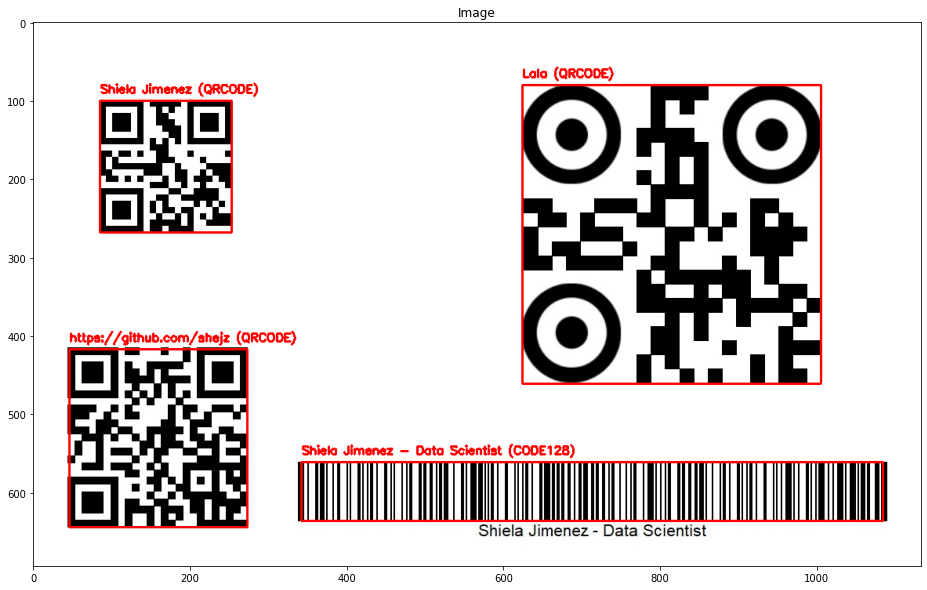

In [7]:
# loop over the detected barcodes
for barcode in barcodes:
	# extract the bounding box location of the barcode and draw the
	# bounding box surrounding the barcode on the image
	(x, y, w, h) = barcode.rect
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

	# the barcode data is a bytes object so if we want to draw it on
	# our output image we need to convert it to a string first
	barcodeData = barcode.data.decode("utf-8")
	barcodeType = barcode.type

	# draw the barcode data and barcode type on the image
	text = "{} ({})".format(barcodeData, barcodeType)
	cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (0, 0, 255), 2)

	# print the barcode type and data to the terminal
	print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData))

# show the output image
plt_imshow("Image", image)